Loading Breast Cancer dataset...
Data loaded successfully.

Data Overview:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal d

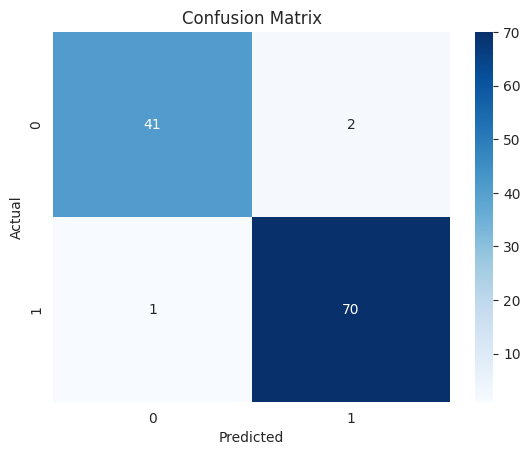

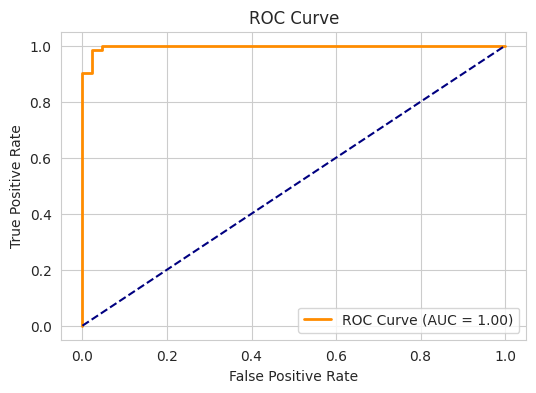


 Logistic Regression Task Completed Successfully!


In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, accuracy_score, precision_score, recall_score
)

sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

# ----------------- Load and Prepare Dataset ----------------- #
def load_data():
    print("Loading Breast Cancer dataset...")
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    print("Data loaded successfully.")
    return df, data

def explore_data(df):
    print("\nData Overview:")
    print(df.head())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nTarget Distribution:\n", df['target'].value_counts())

# ----------------- Preprocessing ----------------- #
def preprocess(df):
    X = df.drop('target', axis=1)
    y = df['target']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ----------------- Model Training ----------------- #
def train_logistic(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

# ----------------- Evaluation ----------------- #
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("\n Evaluation Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))

    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return y_test, y_pred, y_proba

# ----------------- ROC Curve ----------------- #
def plot_roc(y_test, y_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# ----------------- Main Workflow ----------------- #
def main():
    df, data = load_data()
    explore_data(df)

    X_train, X_test, y_train, y_test = preprocess(df)
    model = train_logistic(X_train, y_train)

    y_test, y_pred, y_proba = evaluate(model, X_test, y_test)
    plot_roc(y_test, y_proba)

    print("\n Logistic Regression Task Completed Successfully!")

# Run the pipeline
main()
